# Домашнее задание №1: Процесс деградации HR изображений

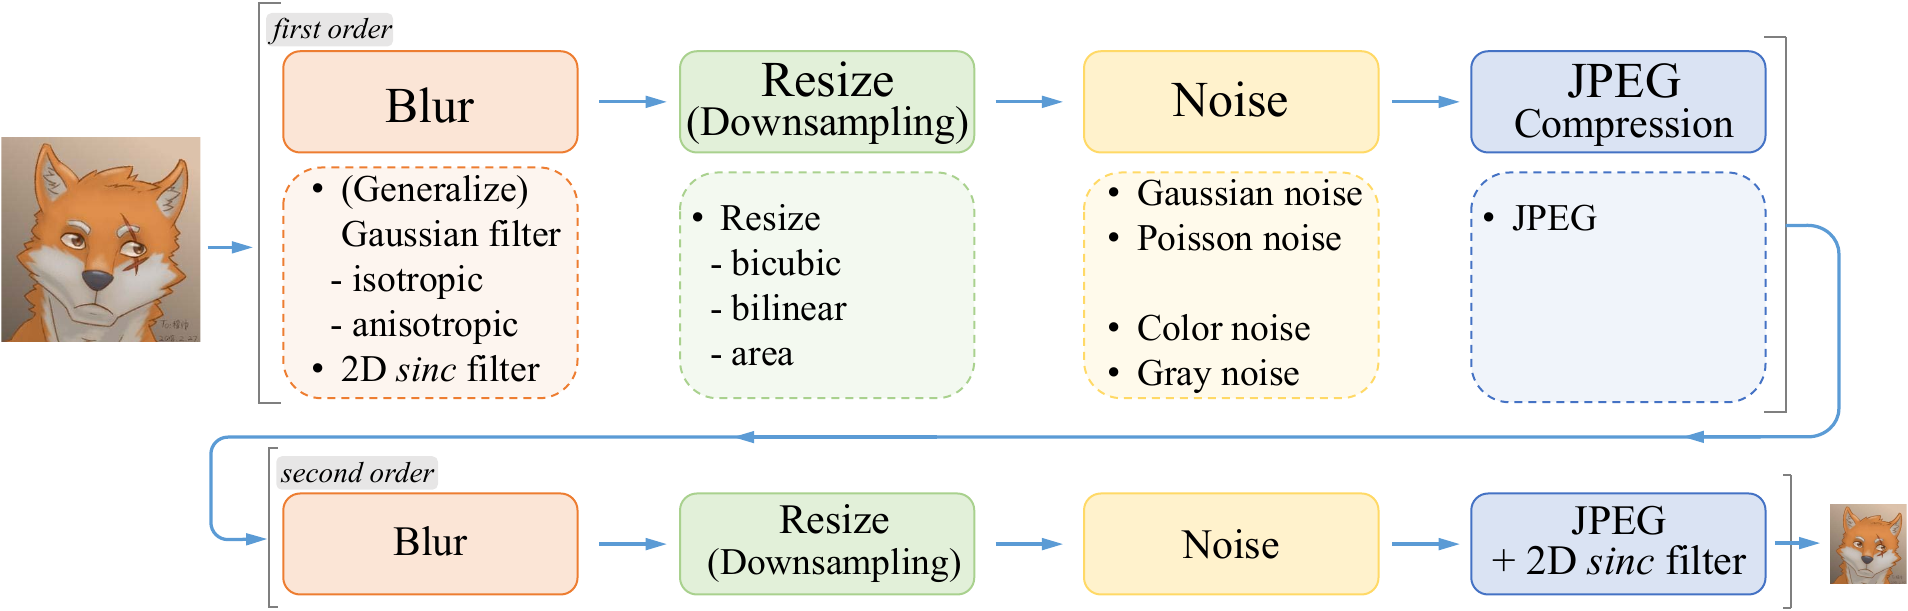

Источник ["Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data"](https://arxiv.org/abs/2107.10833).

**[0 баллов] Считайте изображение.**

In [1]:
# скачаем изображение, которое будет использоваться для демонстрации результатов
!wget -O hr.png https://github.com/aiedu-courses/super_resolution/blob/main/data/hr.png?raw=true

--2024-04-14 10:50:40--  https://github.com/aiedu-courses/super_resolution/blob/main/data/hr.png?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aiedu-courses/super_resolution/raw/main/data/hr.png [following]
--2024-04-14 10:50:40--  https://github.com/aiedu-courses/super_resolution/raw/main/data/hr.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aiedu-courses/super_resolution/main/data/hr.png [following]
--2024-04-14 10:50:41--  https://raw.githubusercontent.com/aiedu-courses/super_resolution/main/data/hr.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

In [77]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import j1

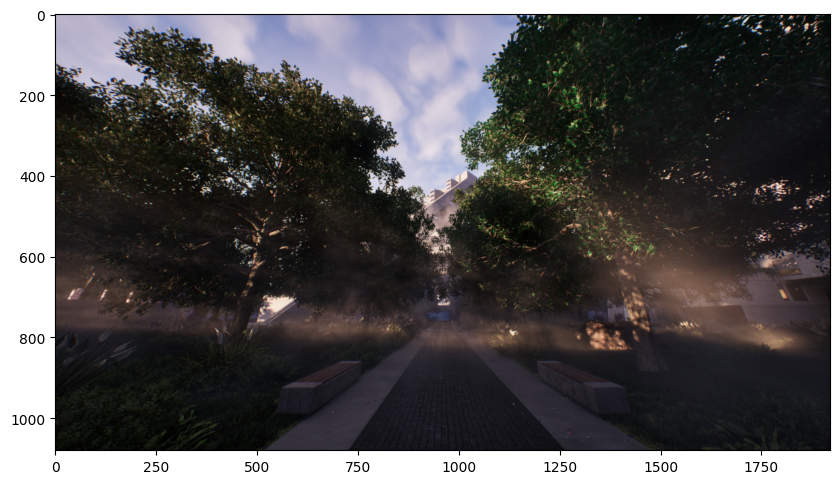

In [127]:
# считаем изображение при помощи библиотеки pillow и приведем к RGB формату
hr_img = Image.open("hr.png").convert("RGB")
_ = plt.figure(figsize=(10, 7))
_ = plt.imshow(hr_img)

**[1 балл] Преобразуйте изображение PIL.Image.Image в np.ndarray, тип данных используйте np.uint8.**

**Какое разрешение имеет полученное изображение?**

In [ ]:
hr_img = ...

**Полноценные пайплайны деградации состоят из нескольких компонент, реализуем каждую по отдельности и посмотрим на эффект, который она дает.**

### **[3 балла] Random Crop**

Random Crop вырезает из изображения случайный участок размера (h_out, w_out) и возвращает его в качестве нового изображения.

In [ ]:
# реализуйте объявленную функцию
def random_crop(img: np.ndarray, h_out: int, w_out: int) -> np.ndarray:
    """
        Parameters
        ----------
        img: np.ndarray
            Изображение в формате (h_in, w_in, c), тип np.uint8.
        h_out: int
            Высота выходного изображения в пикселях.
        w_out: int
            Ширина выходного изображения в пикселях.

        Returns
        -------
        np.ndarray
            Изображение в формате (h_out, w_out, c), тип np.uint8.
    """
    ...

Примените random_crop к hr_img, полученному на предыдущем шаге, установите h_out и w_out равными 768, визуализируйте полученные результаты, убедитесь, что разрешение полученного изображения совпадает с ожидаемым результатом (768, 768, 3).

In [ ]:
hr_img = ...
...

### **[3 балла] Resize**

Resize используется для изменения разрешения изображений в factor раз. Существует несколько алгоритмов, которые используются для интерполяции значений в методах resize. Будем использовать следующие три: area, bilinear, и bicubic.

In [ ]:
# реализуйте объявленную функцию
def resize(img: np.ndarray, mode: str, factor: float) -> np.ndarray:
    """
        Parameters
        ----------
        img: np.ndarray
            Изображение в формате (h_in, w_in, c), тип np.uint8.
        mode: str
            Метод интерполяции [area | bilinear | bicubic].
        factor: float
            h_out = factor * h_in, w_out = factor * w_in.

        Returns
        -------
        np.ndarray
            Изображение в формате (h_out, w_out, c), тип np.uint8.
    """
    ...

Примените resize к hr_img, полученному на предыдущем шаге, попробуйте различные варианты mode и factor, визуализируйте результаты. После экспериментов необходимо получить hr_img после resize с параметрами mode="bicubic" и factor=0.5 для использования в последующих шагах (применяйте над исходным изображением с предыдущего шага).

Убедитесь, что разрешение полученного изображения совпадает с ожидаемым результатом (384, 384, 3).

In [ ]:
...

### **[7 баллов] Blur**

Реализуйте применение ядра gaussian blur с различными параметрами, обязательными параметрами являются mode и n, остальные параметры вы можете задать сами их значения необходимо будет менять в каждом новом блоке итогового пайплайна для получения различных вариаций блюра.

Пример реализации можно найти по [ссылке](https://github.com/XPixelGroup/BasicSR/blob/master/basicsr/data/degradations.py), но я надеюсь, что вы попробуете закодить сами, это в ваших же интересах :)

In [ ]:
# реализуйте объявленную функцию
def blur(img: np.ndarray, mode: str, n: int, **kwargs) -> np.ndarray:
    """
        Parameters
        ----------
        img: np.ndarray
            Изображение в формате (h_in, w_in, c), тип np.uint8.
        mode: str
            Тип gaussian blur [isotropic | anisotropic].
        n: int
            Размер ядра.
        **kwargs: Any
            Другие ваши аргументы, которые необходимы, например: sigma_x, sigma_y.

        Returns
        -------
        np.ndarray
            Изображение в формате (h_out, w_out, c), тип np.uint8.
    """
    ...

Примените blur к hr_img, полученному на предыдущем шаге, попробуйте различные варианты mode, визуализируйте результаты. После экспериментов необходимо получить hr_img после blur с параметром mode="isotropic" для использования в последующих шагах (применяйте над исходным изображением с предыдущего шага).

In [ ]:
...
hr_img = blur(hr_img, ...)

### **[7 баллов] Noise**
Реализуйте добавление шума к изображению, необходимо реализовать два типа шума: gaussian и poisson, также необходимо добавить возможность использовать серый шум (значения по всем каналам RGB равны).

Для генерации gaussian noise можно воспользоваться np.random.normal, а для генерации poisson noise - np.random.poisson.

Для получения компоненты шума в poisson noise необходимо вычесть из зашумленного изображения исходное, после этого можно применить scale и добавить его обратно. Это необходимо из-за того, что poisson noise не является аддитивным, в отличие от gaussian noise, т.е. изначально делать img + noise не корректно.

Если затрудняетесь с реализацией poisson noise, то можно посмотреть здесь:


*   [skimage noise implementation](https://github.com/scikit-image/scikit-image/blob/main/skimage/util/noise.py).
*   [github issue](https://github.com/yu4u/noise2noise/issues/14).



In [ ]:
# реализуйте объявленную функцию
def noise(img: np.ndarray, mode: str, scale: float, gray_noise: bool) -> np.ndarray:
    """
        Parameters
        ----------
        img: np.ndarray
            Изображение в формате (h_in, w_in, c), тип np.uint8.
        mode: str
            Тип шума [gaussian | poisson].
        scale: int
            Масштаб шума [0, +inf].

        Returns
        -------
        np.ndarray
            Изображение в формате (h_out, w_out, c), тип np.uint8.
    """
    ...

Примените noise к hr_img, полученному на предыдущем шаге, попробуйте различные варианты mode, scale и gray_noise, визуализируйте результаты. После экспериментов необходимо получить hr_img после noise с параметрами mode="gaussian", scale=10 и gray_noise=False для использования в последующих шагах (применяйте над исходным изображением с предыдущего шага).

In [ ]:
...

### **[2 балла] JPEG**

Я не буду просить вас реализовывать алгоритм сжатия JPEG, предлагается найти какую-либо реализацию и применить.

Одну из библиотек можно найти по [ссылке](https://github.com/mlomnitz/DiffJPEG), но я надеюсь, что вы попробуете найти сами, это в ваших же интересах :)

In [ ]:
# реализуйте объявленную функцию
def jpeg(img: np.ndarray, quality: int, **kwargs) -> np.ndarray:
    """
        Parameters
        ----------
        img: np.ndarray
            Изображение в формате (h_in, w_in, c), тип np.uint8.
        quality: int
            Качество сжатия [0, 100].
        **kwargs: Any
            Другие ваши аргументы, которые необходимы, например: объект jpeger.

        Returns
        -------
        np.ndarray
            Изображение в формате (h_out, w_out, c), тип np.uint8.
    """
    ...

Примените jpeg к hr_img, полученному на предыдущем шаге, попробуйте различные варианты quality, визуализируйте результаты. После экспериментов необходимо получить hr_img после jpeg с параметром quality=70 для использования в последующих шагах (применяйте над исходным изображением с предыдущего шага).

In [ ]:
...
hr_img = jpeg(hr_img, ...)

### **[7 баллов] 2D sinc kernel**

Реализуйте применение ядра размера (n,n) с отсечением по частоте wc к изображению img.

Формула для получения значений ядра приведена ниже.
$$
k(i,j) = \begin{cases}
\text{if} \: i,j = \frac{n - 1}{2}, \text{then} \: \frac{w_c^2}{4\pi},\\
\text{otherwise} \: \frac{w_c}{2\pi\sqrt{n_1^2 + n_2^2}}J_1(w_c\sqrt{n_1^2 + n_2^2})
\end{cases}
$$
$$
n_1 = i - \frac{n - 1}{2}, n_2 = j - \frac{n - 1}{2}
$$

$J_1$ - функция Бесселя первого порядка. Используйте импортированную функцию j1 из модуля scipy.special.

Для удобства реализации получения ядра вам может пригодиться функция np.fromfunction.

Описание и реализацию можно найти по [ссылке](https://dsp.stackexchange.com/questions/58301/2-d-circularly-symmetric-low-pass-filter), но я надеюсь, что вы попробуете закодить сами, это в ваших же интересах :)

In [ ]:
# реализуйте объявленную функцию
def sinc_kernel(img: np.ndarray, wc: float, n: int) -> np.ndarray:
    """
        Parameters
        ----------
        img: np.ndarray
            Изображение в формате (h_in, w_in, c), тип np.uint8.
        wc: float
            Порог отсечения по частоте, 0<=wc<=np.pi.
        n: int
            Размер ядра, должен быть нечетным.

        Returns
        -------
        np.ndarray
            Изображение в формате (h_out, w_out, c), тип np.uint8.
    """
    assert n % 2
    ...

Примените sinc_kernel к hr_img, полученному на предыдущем шаге, попробуйте различные варианты wc и n, визуализируйте результаты. После экспериментов необходимо получить hr_img после sinc_kernel с параметрами wc=np.pi/3 и n=5 для использования в последующих шагах (применяйте над исходным изображением с предыдущего шага).

In [ ]:
...

### **[9 баллов] Пайплайн деградации**

Соберем все части в мультистадийный пайплайн. Для этого реализуйте класс DegradationPipeline.

Найти схожий пайплайн можно в библиотеке [BasicSR](https://github.com/XPixelGroup/BasicSR/tree/master).





In [163]:
class DegradationPipeline:
    def __init__(
            self,
            resize_prob: tuple[float, float, float],
            resize_range1: tuple[float, float],
            resize_range2: tuple[float, float],
            downscale_factor: int,
            sinc_prob1: float,
            sinc_prob2: float,
            isotropic_prob: float,
            gaussian_noise_prob: float,
            gaussian_noise_range: tuple[int, int],
            poisson_noise_range: tuple[int, int],
            gray_noise_prob: float,
            jpeg_quality: int,
            sinc_jpeg_prob: float,
        ) -> None:
        """
            Parameters
            ----------
            resize_prob: tuple[float, float, float]
                Вероятность для "up", "down" и "keep" resize.
            resize_range1: tuple[float, float]
                Применяется на этапе first-order.
                Если "up", то resize factor выбирается из [1.0, resize_range1[1]].
                Если "down", то resize factor выбирается из [resize_range1[0], 1.0].
                Если "keep", то resize factor = 1.0.
            resize_range2: tuple[float, float]
                Применяется на этапе second-order.
                Если "up", то resize factor выбирается из [1.0, resize_range2[1]].
                Если "down", то resize factor выбирается из [resize_range2[0], 1.0].
                Если "keep", то resize factor = 1.0.
            downscale_factor: int
                Коэффициент во сколько раз уменьшить итоговое изображение относительно исходного, например, 4.
            sinc_prob1: float
                Вероятность того, что в first-order blur будет использоваться sinc_kernel.
            sinc_prob2: float
                Вероятность того, что в second-order blur будет использоваться sinc_kernel.
            isotropic_prob: float
                Вероятность того, что при условии использования gaussian blur будет использоваться isotropic ядро.
            gaussian_noise_prob: float
                Вероятность того, что будет использоваться gaussian noise.
            gaussian_noise_range: tuple[int, int]
                Нижнее и верхнее значение параметра scale для gaussian noise.
                scale выбирается случайным образом из [gaussian_noise_range[0], gaussian_noise_range[1]]
            poisson_noise_range: tuple[int, int]
                Нижнее и верхнее значение параметра scale для poisson noise.
                scale выбирается случайным образом из [poisson_noise_range[0], poisson_noise_range[1]]
            gray_noise_prob: float
                Вероятность использования серого шума.
            jpeg_quality: int
                Качество изображения после JPEG сжатия.
            sinc_jpeg_prob: float
                Вероятность применения sinc_kernel до последнего JPEG сжатия.

            Returns
            -------
            None
        """
        # resize
        self.resize_mode = ["area", "bicubic", "bilinear"]
        self.resize_prob = resize_prob
        self.resize_range1 = resize_range1
        self.resize_range2 = resize_range2
        self.downscale_factor = 1.0 / downscale_factor

        # blur
        self.blur_kernel_range = [2 * v + 1 for v in range(3, 11)]
        self.sinc_prob1 = sinc_prob1
        self.sinc_prob2 = sinc_prob2
        self.isotropic_prob = isotropic_prob

        # noise
        self.gaussian_noise_prob = gaussian_noise_prob
        self.gaussian_noise_range = gaussian_noise_range
        self.poisson_noise_range = poisson_noise_range
        self.gray_noise_prob = gray_noise_prob

        # jpeg
        self.jpeg_quality = jpeg_quality

        # last sinc kernel
        self.sinc_jpeg_prob = sinc_jpeg_prob



    def process(self, x: np.ndarray) -> np.ndarray:
        """
            Parameters
            ----------
            x: np.ndarray
                Изображение в формате (h_in, w_in, c), тип np.uint8.

            Returns
            -------
            np.ndarray
                Изображение в формате (h_out, w_out, c), тип np.uint8.
        """
        # ниже приведены некоторые вспомогательные части кода, которые вам могут понадобиться
        # save init height
        h_in, _, _ = x.shape

        # calculate target height
        h_out = int(h_in * self.downscale_factor)

        # выбор размера ядра
        kernel_size = np.random.choice(self.blur_kernel_range)

        # выбор wc для sinc_kernel
        if kernel_size < 13:
            wc = np.random.uniform(np.pi / 3, np.pi)
        else:
            wc = np.random.uniform(np.pi / 5, np.pi)

        # не забудьте привести изображение к нужному разрешению в конце (до финального sinc_kernel)
        resize_mode = np.random.choice(self.resize_mode)
        h, _, _ = x.shape
        x = resize(x, resize_mode, h_out / h)

        # first-order
        # blur
        ...
        # resize
        ...
        # noise
        ...
        # jpeg
        ...

        # second-order
        # blur
        ...
        # resize
        ...
        # noise
        ...
        # jpeg + sinc_kernel
        ...

        return x

Проведите эксперименты с различными параметрами пайплайна, визуализируйте результаты, посмотрите на разрешения входа и выхода, убедитесь, что они корректные. Пайплайн нужно запускать на random_crop со входного hr_img.

In [157]:
# инициализируем пайплайн
degr_pipe = DegradationPipeline(
    resize_prob=[0.2, 0.7, 0.1],
    resize_range1=[0.15, 1.5],
    resize_range2=[0.3, 1.2],
    downscale_factor=4,
    sinc_prob1=0.6,
    sinc_prob2=0.8,
    isotropic_prob=0.5,
    gaussian_noise_prob=0.6,
    gaussian_noise_range=[1, 30],
    poisson_noise_range=[10, 510],
    gray_noise_prob=0.2,
    jpeg_quality=80,
    sinc_jpeg_prob=0.5,
)

In [ ]:
# считаем изображение при помощи библиотеки pillow и приведем к RGB формату
hr_img = Image.open("hr.png").convert("RGB")
# сконвертируем в np.ndarray, тип np.uint8
hr_img = ...
# сделаем random_crop с h = w = 768
hr_img = ...
# отрисуем изображение
_ = plt.figure(figsize=(7, 7))
_ = plt.imshow(hr_img)

In [ ]:
lr_img = ...
...

### **[1 балл] Feedback**

Напишите ваши эмоции от этого домашнего задания, было ли оно интересным, оцените сложность, затраты по времени и т.п., все что пожелаете :)